In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from create_cluster import get_config
config = get_config()

import psycopg2 


In [3]:
# establish connection with the database 
from sql_queries import create_connection

In [4]:
cur, conn = create_connection()


In [5]:
sql = "select * from songs order by song_id;"
df_songs = pd.read_sql_query(sql, conn)

C:\Users\zzbra\AppData\Local\Temp\ipykernel_31892\2888160293.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_songs = pd.read_sql_query(sql, conn)


In [6]:
df_songs.head()

,song_id,title,artist_id,year,duration
0,SOFRDWL12A58A7CEF7,Hit Da Scene,AR9Q9YC1187FB5609B,0,252.943222
1,SOERIDA12A6D4F8506,I Want You (Album Version),ARBZIN01187FB362CC,2006,192.286896
2,SOIGHOD12A8C13B5A1,Indian Angel,ARY589G1187B9A9F4E,2004,171.571793
3,SOAPERH12A58A787DC,The One And Only (Edited),ARZ5H0P1187B98A1DD,0,230.425674
4,SOKTJDS12AF72A25E5,Drown In My Own Tears (24-Bit Digitally Remast...,ARA23XO1187B9AF18F,0,192.522003


In [7]:
sql = "select * from songplay;"
df_songplays = pd.read_sql_query(sql, conn)
df_songplays.columns

C:\Users\zzbra\AppData\Local\Temp\ipykernel_31892\1676052027.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_songplays = pd.read_sql_query(sql, conn)


Index(['songplay_id', 'start_time', 'user_id', 'level', 'song_id', 'artist_id',
       'session_id', 'location', 'user_agent'],
      dtype='object')

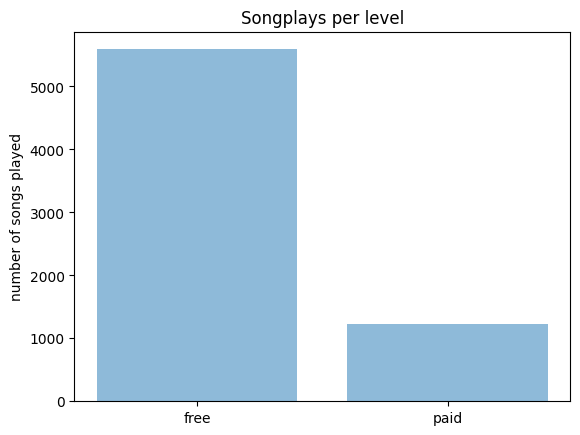

In [8]:
df_songplays['level'].value_counts()
level = ('Free', 'Paid')
y_pos = np.arange(len(level))
pay_level_count = df_songplays['level'].value_counts()

plt.bar(y_pos, pay_level_count, align='center', alpha=0.5)
plt.xticks(y_pos, level)
plt.ylabel('Number of Songs Played')
plt.title('Songplays per Pay Level')
plt.savefig("./plots/Songplays_per_pay_level", bbox_inches='tight')
plt.show()

In [22]:
query = """
select time.hour,
       count(songplay.songplay_id) as count_songplays
  from songplay
  left join time
    on songplay.start_time = time.start_time
 group by hour
 order by hour;
"""

C:\Users\zzbra\AppData\Local\Temp\ipykernel_31892\794084424.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn).plot(kind="barh", x="hour", legend=None, ax=ax, zorder=2)


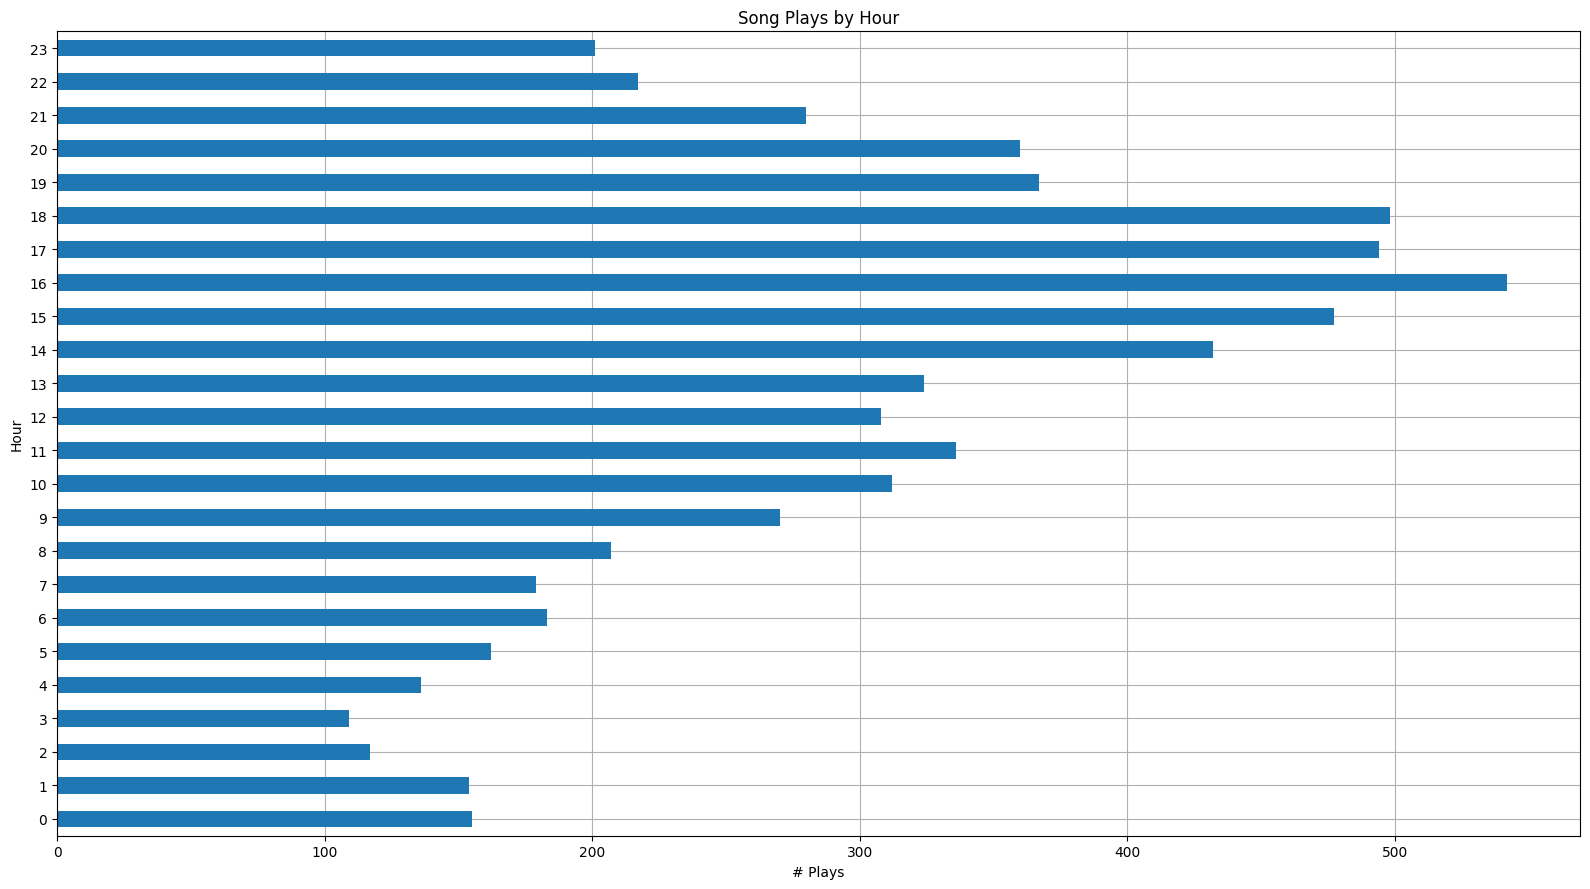

In [23]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()

pd.read_sql(query, conn).plot(kind="barh", x="hour", legend=None, ax=ax, zorder=2)
ax.grid(True, zorder=0)
ax.set_xlabel("Number of Plays")
ax.set_ylabel("Hour")
ax.set_title("Song Plays by Hour")

plt.tight_layout()
plt.savefig("./plots/songplays_by_hour.png", dpi=120)

In [9]:
query = """
select users.gender || ' - ' || users.level as gender_level,
       count(songplay.songplay_id)
  from songplay
  left join users
    on songplay.user_id = users.user_id
 group by users.gender, users.level
 order by users.gender, users.level;
"""

C:\Users\zzbra\AppData\Local\Temp\ipykernel_16516\549315127.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn).plot(kind="barh", x="gender_level", legend=None, ax=ax, zorder=2)


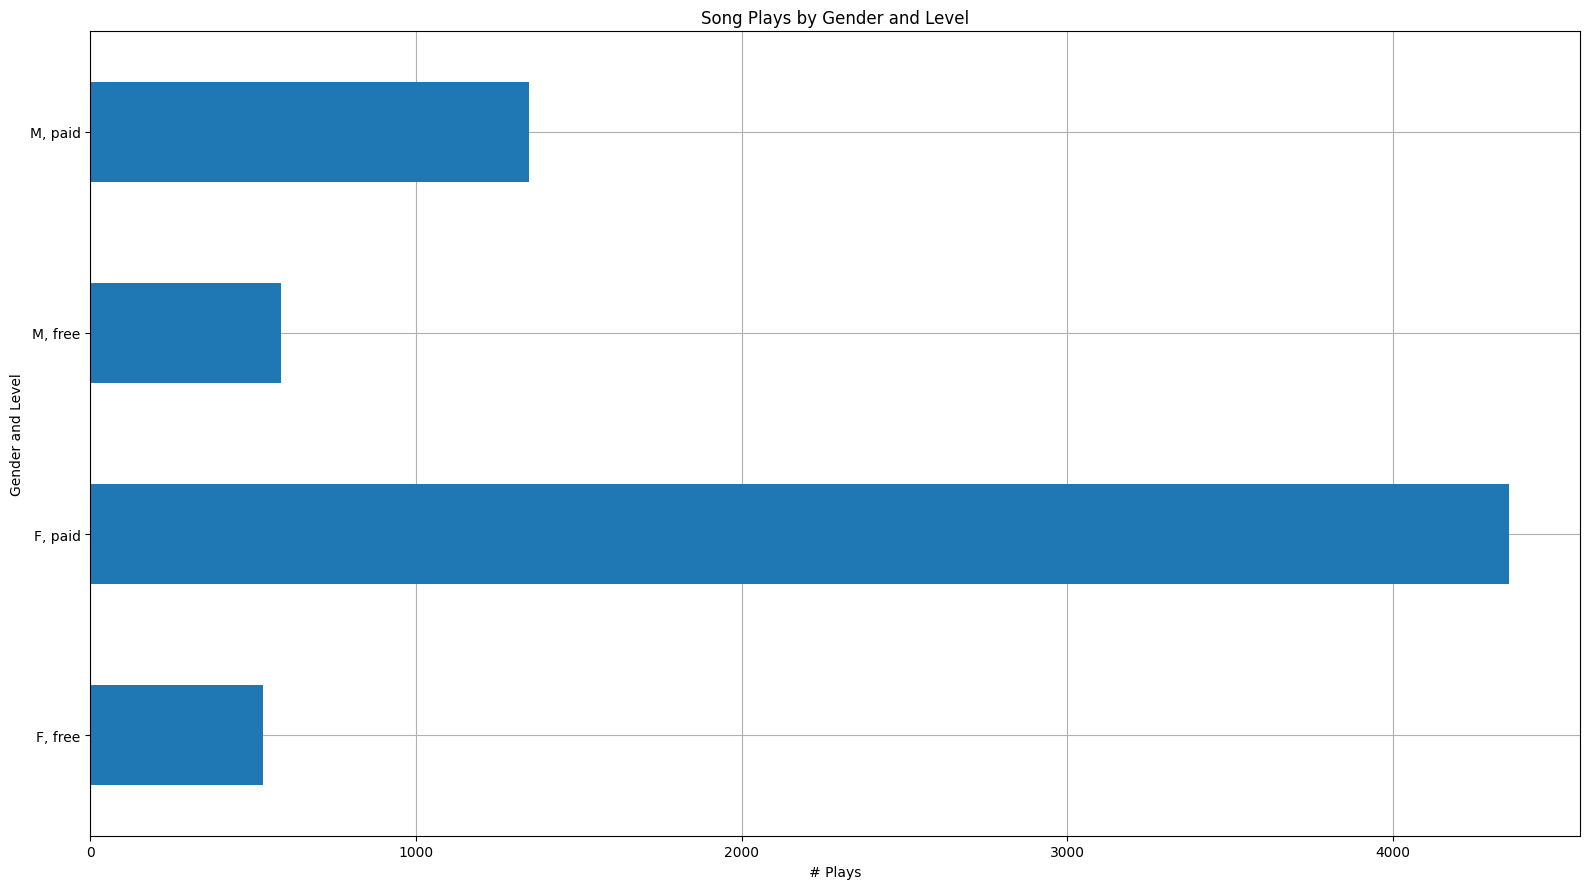

In [11]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()

pd.read_sql(query, conn).plot(kind="barh", x="gender_level", legend=None, ax=ax, zorder=2)
ax.grid(True, zorder=0)
ax.set_xlabel("# Song plays")
ax.set_ylabel("Gender and Level")
ax.set_title("Song Plays by Gender and Pay Level")

plt.tight_layout()
plt.savefig("./plots/songplays_by_gender_and_pay_level.png", dpi=120)